# Default Imports

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Circuit

In [19]:
qbit = 5
creg = 5

circuit = QuantumCircuit(qbit,creg)

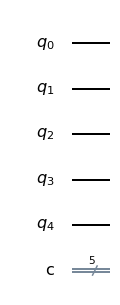

In [20]:
circuit.draw('mpl')

In [21]:
circuit.cx(0,1)

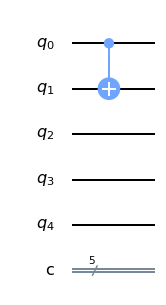

In [22]:
circuit.draw()

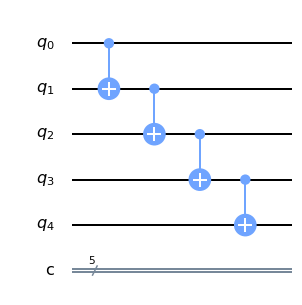

In [23]:
for i in range(4):
    circuit.cx(i+1,i+2)

circuit.draw()


In [24]:
circuit.h([0,1,4])

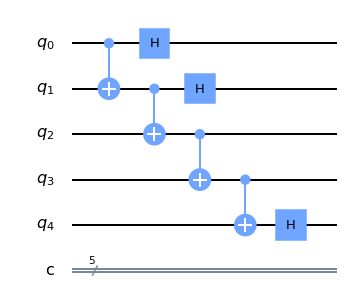

In [25]:
circuit.draw()

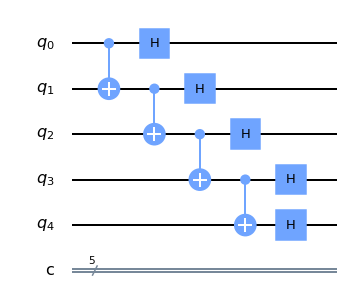

In [26]:
circuit.h(2)
circuit.h(3)
circuit.draw()

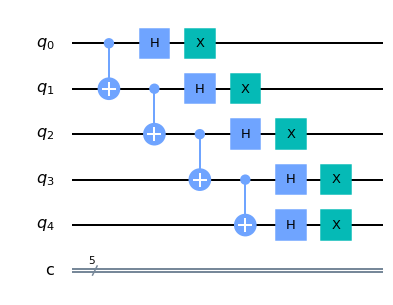

In [27]:
circuit.x(range(5))
circuit.draw()

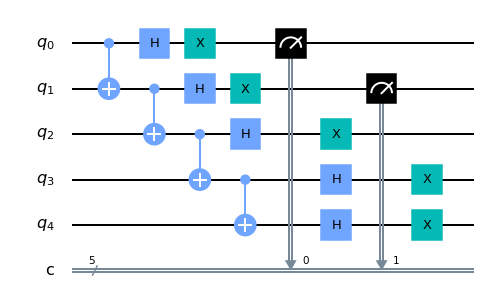

In [29]:
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

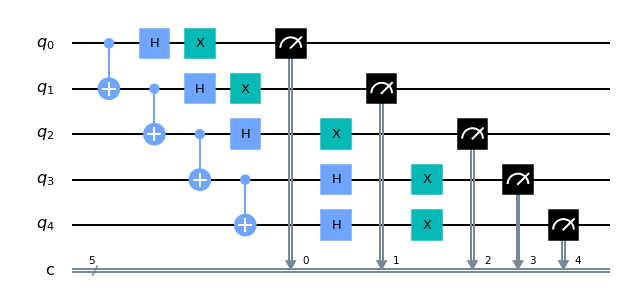

In [30]:
circuit.measure(range(2,5),range(2,5))
#circuit.measure([2,3,4],[3,2,4])
circuit.draw()

In [35]:
backend_run = Aer.get_backend("qasm_simulator")

In [51]:
shots_run = 5024

In [38]:
job = execute(circuit,backend = backend_run,shots = shots_run)

In [39]:
result = job.result()

In [42]:
count = result.get_counts()

In [43]:
print(count)

{'00000': 28, '00001': 38, '10000': 32, '10001': 23, '10010': 34, '10011': 32, '10100': 28, '10101': 24, '10110': 31, '10111': 34, '11000': 27, '11001': 36, '11010': 29, '11011': 35, '11100': 30, '11101': 28, '11110': 38, '11111': 31, '00010': 34, '00011': 26, '00100': 35, '00101': 53, '00110': 45, '00111': 20, '01000': 37, '01001': 28, '01010': 34, '01011': 32, '01100': 37, '01101': 27, '01110': 27, '01111': 31}


In [52]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(1)
qc.measure([0,1],[0,1])
job_1 = execute(qc,backend = backend_run,shots = shots_run)
result_1 = job_1.result()
counts = result_1.get_counts()
print(counts)

{'10': 2429, '11': 2595}


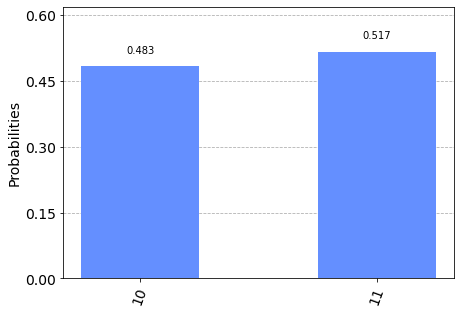

In [53]:
plot_histogram(counts)

# Problems

## 1. {'11':1000} 

With the given inital state put a circuit in middle of the barrior to get the desired state

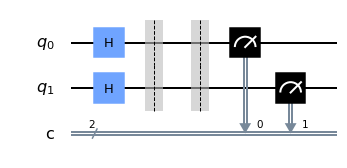

In [78]:
prob_1 = QuantumCircuit(2,2)
prob_1.h([0,1])
prob_1.barrier()
####
#prob_1.h([0,1])
#prob_1.x([0,1])

###
prob_1.barrier()
prob_1.measure([0,1],[0,1])
prob_1.draw()


{'00': 261, '01': 261, '10': 243, '11': 235}


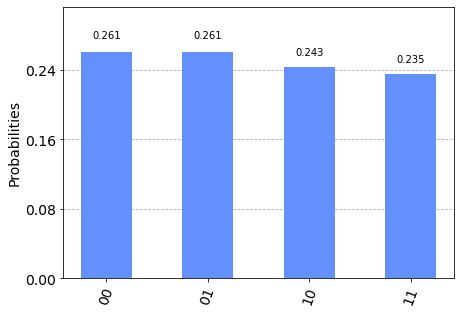

In [79]:
shots = 1000
job = execute(prob_1,backend = backend_run,shots = shots)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## 2. {'1':1000}

With the givin circuit make a circuit in between the barrier to get the desired output

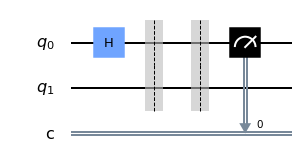

In [86]:
prob_2 = QuantumCircuit(2,1)
prob_2.h(0)
prob_2.barrier()
####

'''
Sai solution 
prob_2.cx(0,1)
prob_2.x(1)
prob_2.cx(1,0)

Abhay solution
prob_2.cx(0,1)
prob_2.cx(1,0)
prob_2.x(0)
'''
###
prob_2.barrier()
prob_2.measure(0,0)
prob_2.draw()


{'0': 508, '1': 492}


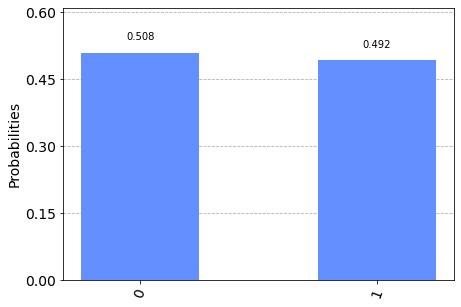

In [87]:
shots = 1000
job = execute(prob_2,backend = backend_run,shots = shots)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## 3. {'00':250,'11':250,'10':500}
With the givin circuit make a circuit in between the barrier to get the desired output


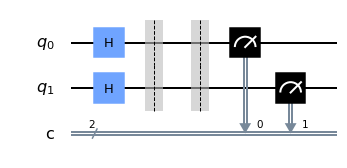

In [94]:
prob_3 = QuantumCircuit(2,2)
prob_3.h([0,1])
prob_3.barrier()
####

###
prob_3.barrier()
prob_3.measure([0,1],[0,1])
prob_3.draw()

{'00': 253, '01': 249, '10': 257, '11': 241}


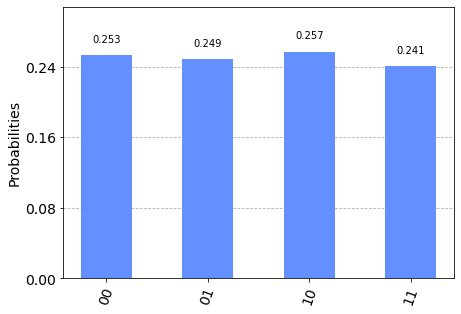

In [95]:
shots = 1000
job = execute(prob_3,backend = backend_run,shots = shots)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)